# Correlación

## Definición

La correlación es una medida estadística que indica la relación entre dos variables cuantitativas, mostrando cuánto se asocian sus valores. Se mide típicamente con el coeficiente de correlación de Pearson, que varía entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta, y 0 indica ausencia de correlación lineal.

Por ejemplo, si consideramos las variables $X = \\{1, 2, 3, 4\\}$ y $Y = \\{2, 4, 6, 8\\}$, la correlación positiva perfecta se observa porque $Y = 2X$. El coeficiente se calcula como:

<div class="alert alert-block alert-info">

**Definición.**
$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} 
$$
<br>
$$
b = \bar{y} - m \bar{x} 
$$




<div class="alert alert-success">

## Ejercicio 1.

Con el siguiente código en Python se carga un conjunto de datos reales sobre salud en México, enfocado en el análisis de factores asociados con la **hipertensión arterial**. Este conjunto fue construido a partir de fuentes oficiales y públicas, combinando datos de la Encuesta Nacional de Salud y Nutrición (ENSANUT) y una versión integrada publicada en Kaggle.

```python
import pandas as pd
import numpy as np

df = pd.read_csv("Data.csv")
df.columns

# Conversión de cada columna en un arreglo para facilitar el análisis
edad                          = df['edad'].to_numpy()
sexo                          = df['sexo'].to_numpy()
actividad_total               = df['actividad_total'].to_numpy()
valor_hemoglobina_glucosilada = df['valor_hemoglobina_glucosilada'].to_numpy()
resultado_glucosa_promedio   = df['resultado_glucosa_promedio'].to_numpy()
valor_colesterol_ldl         = df['valor_colesterol_ldl'].to_numpy()
valor_colesterol_hdl         = df['valor_colesterol_hdl'].to_numpy()
valor_trigliceridos          = df['valor_trigliceridos'].to_numpy()
masa_corporal                = df['masa_corporal'].to_numpy()
medida_cintura               = df['medida_cintura'].to_numpy()
riesgo_hipertension          = df['riesgo_hipertension'].to_numpy()
tension_arterial             = df['tension_arterial'].to_numpy()
```

<br>

Este código tiene las siguientes características:

- **Datos reales y representativos**: El conjunto de datos proviene de la [Encuesta Nacional de Salud y Nutrición (ENSANUT)](https://ensanut.insp.mx/encuestas/ensanutcontinua2022/descargas.php) y fue integrado y publicado en [Kaggle](https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico). Incluye variables biométricas, clínicas y de estilo de vida relevantes para el estudio de enfermedades crónicas como la hipertensión.

- **Variables clave**: Se incluyen indicadores como edad, sexo, actividad física total, hemoglobina glucosilada, glucosa promedio, colesterol LDL y HDL, triglicéridos, masa corporal, medida de cintura, presión arterial y riesgo de hipertensión.

- **Preparación estructurada**: Cada columna se convierte en un arreglo `numpy.ndarray`, lo que facilita el análisis estadístico y la construcción de modelos predictivos.

- **Aplicación práctica**: Este ejercicio busca mostrar cómo la regresión lineal puede ayudar a identificar factores de riesgo asociados con la hipertensión arterial, permitiendo generar modelos explicativos y predictivos útiles para la salud pública.

<br>

En esta ocasión, decidimos trabajar con datos reales para resaltar la importancia de aplicar modelos estadísticos como la regresión lineal en contextos clínicos y sociales. Este enfoque permite extraer conclusiones útiles para el diseño de intervenciones preventivas y políticas de salud en México.

</div>



In [10]:
# Importando los datos 
#Obteniendo los array 
### BEGIN SOLUTION
import pandas as pd
import numpy as np

df = pd.read_csv("Data.xls")

# Conversión de cada columna en un arreglo para facilitar el análisis
edad                          = df['edad'].to_numpy()
sexo                          = df['sexo'].to_numpy()
actividad_total               = df['actividad_total'].to_numpy()
valor_hemoglobina_glucosilada = df['valor_hemoglobina_glucosilada'].to_numpy()
resultado_glucosa_promedio   = df['resultado_glucosa_promedio'].to_numpy()
valor_colesterol_ldl         = df['valor_colesterol_ldl'].to_numpy()
valor_colesterol_hdl         = df['valor_colesterol_hdl'].to_numpy()
valor_trigliceridos          = df['valor_trigliceridos'].to_numpy()
masa_corporal                = df['masa_corporal'].to_numpy()
medida_cintura               = df['medida_cintura'].to_numpy()
riesgo_hipertension          = df['riesgo_hipertension'].to_numpy()
tension_arterial             = df['tension_arterial'].to_numpy()
df.head()
### END SOLUTION

,edad,sexo,actividad_total,valor_hemoglobina_glucosilada,resultado_glucosa_promedio,valor_colesterol_ldl,valor_colesterol_hdl,valor_trigliceridos,masa_corporal,medida_cintura,riesgo_hipertension,tension_arterial
0,41,2,120,5.2,103,86.0,34,123,32.889389,0.0,1,107
1,65,2,240,6.2,131,130.0,73,131,1.000000,0.0,0,104
2,68,2,480,5.2,103,86.0,34,123,1.000000,0.0,0,105
3,35,1,275,5.3,105,107.0,49,297,26.265339,98.5,1,117
4,65,2,255,7.0,154,76.0,41,136,1.000000,0.0,0,123


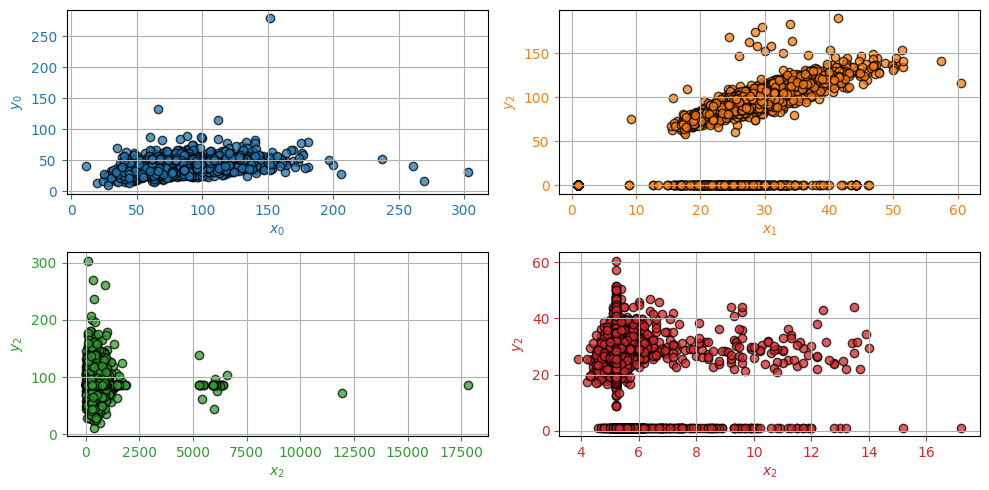

In [8]:
#Analisis exploratorio 
import matplotlib.pyplot as plt

def graficas_dispersion(ejes, x, y, color, refx, refy, ec='k', alpha=0.75, ylim=None):
    ejes.scatter(x, y, fc=color, ec=ec, alpha=alpha)
    ejes.set_xlabel(refx, color=color)
    ejes.set_ylabel(refy, color=color)
    ejes.tick_params(axis='x', colors=color)  # ← Colorea números y ticks del eje X
    ejes.tick_params(axis='y', colors=color)
    ejes.grid()
    if ylim:
        ejes.set_ylim(ylim)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], valor_colesterol_ldl, valor_colesterol_hdl, 'C0', '$x_0$', '$y_0$')
graficas_dispersion(axs[0, 1], masa_corporal, medida_cintura, 'C1', '$x_1$', '$y_2$')
graficas_dispersion(axs[1, 0], actividad_total, valor_colesterol_ldl, 'C2', '$x_2$', '$y_2$')
graficas_dispersion(axs[1, 1], valor_hemoglobina_glucosilada, masa_corporal, 'C3', '$x_2$', '$y_2$')


plt.tight_layout()
plt.show()

<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black">Calcular la media del conjunto de datos $x_0$, $y_0$. Almacenar las medias en las variables `X` y `Y`.</font>

recuerda que puedes calcular la media de esta forma:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i \quad \text{y} \quad \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

</div>

In [16]:
### BEGIN SOLUTION

# Masa corporal vs medida cintura 

# Media de x
N=len(masa_corporal)
X = 0.0
for xi in masa_corporal:
    X += xi
X /= N

# Media de y
Y = 0.0
for yi in medida_cintura:
    Y += yi
Y /= N

# END SOLUTION

print('La masa corporal promedio es: {}'.format(X))
print('El promedio de medida de cintura es: {}'.format(Y))

La masa corporal promedio es: 22.451291626044146
El promedio de medida de cintura es: 68.42555581022225


In [9]:
#quizz.eval_numeric('1', X)
#quizz.eval_numeric('2', Y)

<div class="alert alert-success">

## **Ejercicio 2.**



<font color="Black">Calcular la pendiente \( m \) del conjunto de datos \( x_0 \), \( y_0 \) usando la fórmula (1), basada en *Practical Statistics for Data Scientists* de Peter Bruce y Andrew Bruce. Almacenar la pendiente en la variable `m`. La fórmula (1) es:</font>

$$ m = \frac{\sum_{i=0}^{N} (x_i - \bar{X})(y_i - \bar{Y})}{\sum_{i=0}^{N} (x_i - \bar{X})^2} \;\; \text{para} \;\; i = 0, \dots, N $$

<font color="Black">Donde:
- \( x_i ): Cada valor individual del **independent variable** (predictor)  \( x_0 \).
- \( y_i ): Cada valor individual del **response** (variable dependiente)  \( y_0 \).
- \( $X$ ): La media de todos los valores de \( x_0 \).
- \( $Y$ ): La media de todos los valores de \( y_0 \).
- \( $m$): El **regression coefficient** (pendiente) que mide el cambio en \( y \) por unidad de \( x \).
- \( $N$ ): El número total de observaciones en los datos.

La fórmula deriva del método de **least squares** para minimizar el **residual sum of squares (RSS)**, ajustando la línea \( y_i = b_0 + m x_i \). Usa las medias \( \bar{X} \) y \( \bar{Y} \) para centrar los datos y calcular la relación lineal. ¡A trabajar con tus datos!</font>




</div>





In [10]:
### BEGIN SOLUTION
# Cálculo de m
Sxx = 0
Sxy = 0
for xi, yi in zip(x0, y0):
    Sxy += xi * (yi - Y)
    Sxx += xi * (xi - X)
m = Sxy / Sxx

# END SOLUTION

print('Pendiente m: {}'.format(m))

Pendiente m: 0.7725548289646033


In [11]:
#quizz.eval_numeric('3', m)

<div class="alert alert-success">

## **Ejercicio 3.**

<font color="Black">Calcular la ordenada al origen $b$ del conjunto de datos $x_0$, $y_0$ usando la fórmula $(2)$. Almacenar la pendiente en la variable `b`.</font>

</div>

In [12]:
# Cálculo de b
# b = ...
### BEGIN SOLUTION
# Cálculo de b
b = Y - m * X

### END SOLUTION

print('Ordenada al origen b: {}'.format(b))

Ordenada al origen b: 2.2758950410682526


In [13]:

#quizz.eval_numeric('4', b)

<div class="alert alert-success">

## **Ejercicio 4.**

<font color="Black">

Construir una recta usando los valores de $m$ y $b$ calculados en los ejercicios anteriores como sigue:
* Construir un arreglo para $x$, de nombre `xr0`, usando alguna función de `numpy` (**el arreglo debe ser de 10 elementos**):
```python
xr0 = np. ...
```
* Evaluar $y = mx + b$ usando el arreglo `xr0` para generar el arreglo `yr0`:
```python
yr0 = ...
```
</div>

In [14]:
# Construcción de las rectas
# xr0 = np....
# yr0 = ...

### BEGIN SOLUTION
# Construcción de la recta
xr0 = np.linspace(x0.min(), x0.max(), 10)
yr0 = m * xr0 + b

### END SOLUTION

print(xr0)
print(yr0)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 2.27589504  3.1342893   3.99268355  4.8510778   5.70947206  6.56786631
  7.42626057  8.28465482  9.14304908 10.00144333]


In [15]:
#quizz.eval_numeric('5', xr0)
#quizz.eval_numeric('6', yr0)

<div class="alert alert-info">

Si realizaste correctamente los ejercicios $1-4$, entonces la siguiente celda de código graficará los cuatro conjuntos de datos y en la primera gráfica se verá la línea recta que construiste.

**NOTA**. En esta graficación estamos usando la biblioteca `macti.visual`.

</div>

In [16]:
"""import macti.visual as mvis

axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75, zorder=5)

vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()"""

"import macti.visual as mvis\n\naxp = [dict(xlabel='$x_0$', ylabel='$y_0$'),\n        dict(xlabel='$x_1$', ylabel='$y_1$'),\n        dict(xlabel='$x_2$', ylabel='$y_2$'),\n        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]\n\nvis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)\n\nvis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')\nvis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75, zorder=5)\n\nvis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)\n\nvis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)\n\nvis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)\n\nvis.tight_layout()\nvis.grid()\nvis.show()"

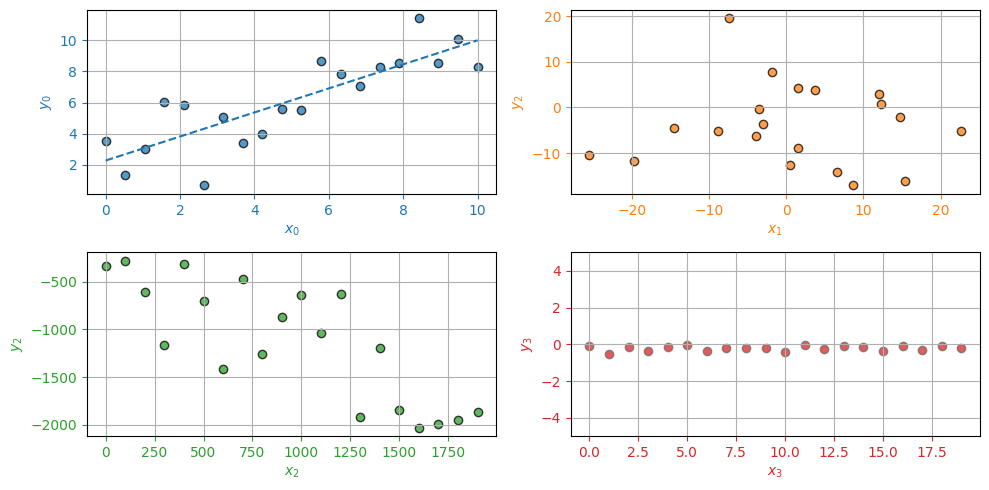

In [17]:

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], x0, y0, 'C0', '$x_0$', '$y_0$')

axs[0,0].plot(xr0,yr0,color="C0",linestyle='--')
graficas_dispersion(axs[0, 1], x1, y1, 'C1', '$x_1$', '$y_2$')
graficas_dispersion(axs[1, 0], x2, y2, 'C2', '$x_2$', '$y_2$')
graficas_dispersion(axs[1, 1], x3, y3, 'C3', '$x_3$', '$y_3$', ec='dimgrey', ylim=(-5, 5))

plt.tight_layout()
plt.show()

<div class="alert alert-success">

## **Ejercicio 5.**

<font color="Black">Construir la función `media(x)` para calcular la media de un conjunto de datos. La función debe recibir como entrada el arreglo con los datos, `x`, y regresa la media de los mismos. Probar la función para los datos `x0` y `y0` como sigue:
```python
X0 = media(x0)
Y0 = media(y0)
```
</font>

</div>

In [18]:
# Función media()
# def media (x) : 
# ...

### BEGIN SOLUTION
def media(x):
    xm = 0.0
    for xi in x:
        xm += xi
    return xm / N

X0 = media(x0)
Y0 = media(y0)

### END SOLUTION

print('Media de x0 : {}'.format(X0))
print('Media de y0 : {}'.format(Y0))

Media de x0 : 5.0
Media de y0 : 6.138669185891269


In [19]:
#quizz.eval_numeric('7', X0)
#quizz.eval_numeric('8', Y0)

<div class="alert alert-success">

## **Ejercicio 6.**

<font color="Black">
    
Construir la función `mincua(x, y)` para calcular $m$ y $b$ de un conjunto de datos. La función recibe como entrada los arreglos de datos, `x, y`, y regresa `m` y `b`. Calcular `m` y `b` para los conjuntos de datos: 

* ($x_1$, $y_1$), almacenar $m$ y $b$ en las variables `m1` y `b1` respectivamente.
* ($x_2$, $y_2$), almacenar $m$ y $b$ en las variables `m2` y `b2` respectivamente.
* ($x_3$, $y_3$), almacenar $m$ y $b$ en las variables `m3` y `b3` respectivamente.

</font>

</div>

In [20]:
# Función mincua()
# def mincua (x) : 
# ...
# 

### BEGIN SOLUTION
def mincua(x, y):
    # Cálculo de la media
    X = media(x)
    Y = media(y)
    
    # Cálculo de m
    Sxx = 0
    Sxy = 0
    for xi, yi in zip(x, y):
        Sxy += xi * (yi - Y)
        Sxx += xi * (xi - X)
    m = Sxy / Sxx

    # Cálculo de b
    b = Y - m * X

    return m, b
### END SOLUTION

In [21]:
# Cálculo de m y b
# m1, b1 = ...
# ...

### BEGIN SOLUTION
m1, b1 = mincua(x1, y1)
m2, b2 = mincua(x2, y2)
m3, b3 = mincua(x3, y3)

### END SOLUTION

print('m1 = {}, \t b1 = {}'.format(m1, b1))
print('m2 = {}, \t b2 = {}'.format(m2, b2))
print('m3 = {}, \t b3 = {}'.format(m3, b3))

m1 = -0.02002336877662938, 	 b1 = -3.9396674988126574
m2 = -0.86095919430528, 	 b2 = -308.1742770138992
m3 = 0.003809973693633117, 	 b3 = -0.24601956385565651


In [22]:
#quizz.eval_numeric('9', [m1, b1])
#quizz.eval_numeric('10', [m2, b2])
#quizz.eval_numeric('11', [m3, b3])

<div class="alert alert-success">

## **Ejercicio 7.**

<font color="Black">
    
Construir las rectas de cada conjunto de datos como sigue:

* Usando `m1` y `b1` construir los arreglos de coordenadas `xr1` y `yr1`.
* Usando `m2` y `b2` construir los arreglos de coordenadas `xr2` y `yr2`.
* Usando `m3` y `b3` construir los arreglos de coordenadas `xr3` y `yr3`.

</font>

</div>

In [23]:
# Construcción de las rectas
# xr1 = np.linspace( ... )
# yr1 = ...
# ...
### BEGIN SOLUTION
# Construcción de las rectas
xr1 = np.linspace(x1.min(), x1.max(), 10)
yr1 = m1 * xr1 + b1

xr2 = np.linspace(x2.min(), x2.max(), 10)
yr2 = m2 * xr2 + b2

xr3 = np.linspace(x3.min(), x3.max(), 10)
yr3 = m3 * xr3 + b3

### END SOLUTION

In [24]:
print(xr1, yr1, sep = '\n', end='\n\n')
print(xr2, yr2, sep = '\n', end='\n\n')
print(xr3, yr3, sep = '\n', end='\n\n')

[-25.52989816 -20.17129323 -14.81268829  -9.45408336  -4.09547843
   1.26312651   6.62173144  11.98033637  17.33894131  22.69754624]
[-3.42847293 -3.53577026 -3.64306758 -3.7503649  -3.85766222 -3.96495955
 -4.07225687 -4.17955419 -4.28685151 -4.39414884]

[   0.          211.11111111  422.22222222  633.33333333  844.44444444
 1055.55555556 1266.66666667 1477.77777778 1688.88888889 1900.        ]
[ -308.17427701  -489.93232915  -671.69038128  -853.44843341
 -1035.20648554 -1216.96453767 -1398.7225898  -1580.48064193
 -1762.23869406 -1943.99674619]

[ 0.          2.11111111  4.22222222  6.33333333  8.44444444 10.55555556
 12.66666667 14.77777778 16.88888889 19.        ]
[-0.24601956 -0.23797629 -0.22993301 -0.22188973 -0.21384645 -0.20580317
 -0.1977599  -0.18971662 -0.18167334 -0.17363006]



In [25]:
"""
quizz.eval_numeric('12', xr1)
quizz.eval_numeric('13', yr1)
quizz.eval_numeric('14', xr2)
quizz.eval_numeric('15', yr2)
quizz.eval_numeric('16', xr3) 
quizz.eval_numeric('17', yr3)
"""

"\nquizz.eval_numeric('12', xr1)\nquizz.eval_numeric('13', yr1)\nquizz.eval_numeric('14', xr2)\nquizz.eval_numeric('15', yr2)\nquizz.eval_numeric('16', xr3) \nquizz.eval_numeric('17', yr3)\n"

<div class="alert alert-info">

Si caculaste todo correctamente, entonces la siguiente celda de código graficará los cuatro conjuntos de datos junto con las líneas rectas que construiste.

</div>

In [26]:
"""axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),
        dict(xlabel='$x_1$', ylabel='$y_1$'),
        dict(xlabel='$x_2$', ylabel='$y_2$'),
        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]

vis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)

vis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')
vis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75)

vis.plot(2, xr1, yr1, c='C1', lw=2, ls = '--')
vis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)

vis.plot(3, xr2, yr2, c='C2', lw=2, ls = '--')
vis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)

vis.plot(4, xr3, yr3, c='C3', lw=2, ls = '--')
vis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)

vis.tight_layout()
vis.grid()
vis.show()"""

"axp = [dict(xlabel='$x_0$', ylabel='$y_0$'),\n        dict(xlabel='$x_1$', ylabel='$y_1$'),\n        dict(xlabel='$x_2$', ylabel='$y_2$'),\n        dict(xlabel='$x_3$', ylabel='$y_3$', ylim=(-5,5)),]\n\nvis = mvis.Plotter(2,2,fig_par=dict(figsize=(10,5)), axis_par=axp)\n\nvis.plot(1, xr0, yr0, c='C0', lw=2, ls = '--')\nvis.scatter(1, x0, y0, fc='C0', ec='k', alpha=0.75)\n\nvis.plot(2, xr1, yr1, c='C1', lw=2, ls = '--')\nvis.scatter(2, x1, y1, fc='C1', ec='k', alpha=0.75)\n\nvis.plot(3, xr2, yr2, c='C2', lw=2, ls = '--')\nvis.scatter(3, x2, y2, fc='C2', ec='k', alpha=0.75)\n\nvis.plot(4, xr3, yr3, c='C3', lw=2, ls = '--')\nvis.scatter(4, x3, y3, fc='C3', ec='dimgrey', alpha=0.75)\n\nvis.tight_layout()\nvis.grid()\nvis.show()"

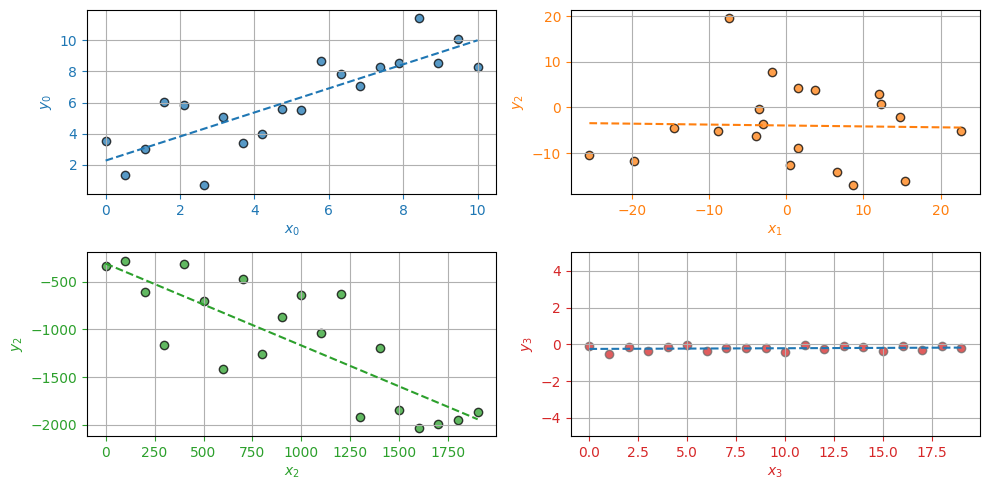

In [27]:

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

graficas_dispersion(axs[0, 0], x0, y0, 'C0', '$x_0$', '$y_0$')
axs[0,0].plot(xr0,yr0,color="C0",linestyle='--')

graficas_dispersion(axs[0, 1], x1, y1, 'C1', '$x_1$', '$y_2$')
axs[0,1].plot(xr1,yr1,color="C1",linestyle='--')

graficas_dispersion(axs[1, 0], x2, y2, 'C2', '$x_2$', '$y_2$')
axs[1,0].plot(xr2,yr2,color="C2",linestyle='--')

graficas_dispersion(axs[1, 1], x3, y3, 'C3', '$x_3$', '$y_3$', ec='dimgrey', ylim=(-5, 5))
axs[1,1].plot(xr3,yr3,color="C0",linestyle='--')

plt.tight_layout()
plt.show()

# Apéndice A: Deducción del método.

Dado el conjunto de datos:

| $x_0$ | $x_1$ | $x_2$ | $\dots$ | $x_N$ |
|-----|-----|-----|---------|-----|
| $y_0$ | $y_1$ | $y_2$ | $\dots$ | $y_N$ |

lo que en principio desearíamos es que se cumpliera que:

$$y_i = m x_i + b \;\; \text{para} \;\; i = 0, \dots, N $$

que es equivalente a 

$$0 = m x_i + b - y_i\;\; \text{para} \;\; i = 0, \dots, N, \tag{A.1} $$


Pero la ecuación $(A.1)$ no se cumple en general, de tal manera que lo que se pide es que las desviaciones de cada punto con respecto de la recta sean pequeñas. 

En el caso de este método, la desviación se define como la diferencia del valor $y_i$ con respecto de la recta elevada al cuadrado, es decir: $(m x_i + b - y_i)^2$. Y para calcular la desviación global se suman todas las diferencias, por lo que obtenemos:

$$
f(m,b) = \sum_{i=1}^{N} (m x_i + b - y_i)^2
$$

Observa que del lado derecho hemos puesto $f(m,b)$ es decir, una función que depende de la pendiente $m$ y de la ordenada al origen $b$. 

El valor de la función $f$ (la desviación global) depende de $m$ y $b$; entonces para encontrar los valores de $m$ y $b$ más adecuados, debemos minimizar $f$ con respecto a esas variables.

Recordando nuestras clases de cálculo, sabemos que para minimizar una función, debemos calcular su derivada, igualarla a cero y resolver para encontrar los puntos críticos (máximos y mínimos). En este caso, debemos derivar con respecto a $m$ y con respecto a $b$, y luego resolver un sistema de dos ecuaciones. Veamos como:

$$
\begin{eqnarray}
\dfrac{\partial f}{\partial m} & = & \dfrac{\partial}{\partial m} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2 \sum_{i=1}^{N} x_i \big(m x_i + b - y_i\big) = 0 \tag{A.2}\\
\dfrac{\partial f}{\partial b} & = & \dfrac{\partial}{\partial b} \left(\sum_{i=1}^{N} (m x_i + b - y_i)^2 \right) = 2\sum_{i=1}^{N} \big(m x_i + b - y_i\big) = 0 \tag{A.3}\\
\end{eqnarray}
$$

De la ecuación $(A.3)$ tenemos que:
$$
m \sum_{i=1}^{N} x_i + \sum_{i=1}^{N} b - \sum_{i=1}^{N} y_i = 0
$$

y despejando $b$ obtenemos:
$$
b = \underbrace{\dfrac{1}{N}\sum_{i=1}^{N} y_i}_{\bar{y}} - m \underbrace{\dfrac{1}{N} \sum_{i=1}^{N} x_i}_{\bar{x}} = \bar{y} - m \bar{x} \tag{A.4}
$$

Ahora sustituimos $(A.4)$ en $(A.2)$ y obtenemos:

$$
\sum_{i=1}^{N} x_i \big(m x_i + \bar{y} - m \bar{x} - y_i\big) = 0
$$

Ahora despejamos $m$:

$$
m = \dfrac{\sum_{i=1}^{N} x_i(y_i - \bar{y})}{\sum_{i=1}^{N} x_i(x_i - \bar{x})} \tag{A.5}
$$

Las ecuaciones $(A.4)$ y $(A.5)$ proporcionan los valores de $m$ y $b$ de un punto crítico de la función $f(m,b)$. Falta demostrar que ese punto crítico es un mínimo. Para ello se deben calcular las derivadas segundas ($\dfrac{\partial}{\partial^2 m}$, $\dfrac{\partial}{\partial^2 b}$, $\dfrac{\partial}{\partial m \partial b}$) y ver que se cumplen los criterios necesarios.